Best path: 0 -> 1 -> 3 -> 0 with cost: 4.0


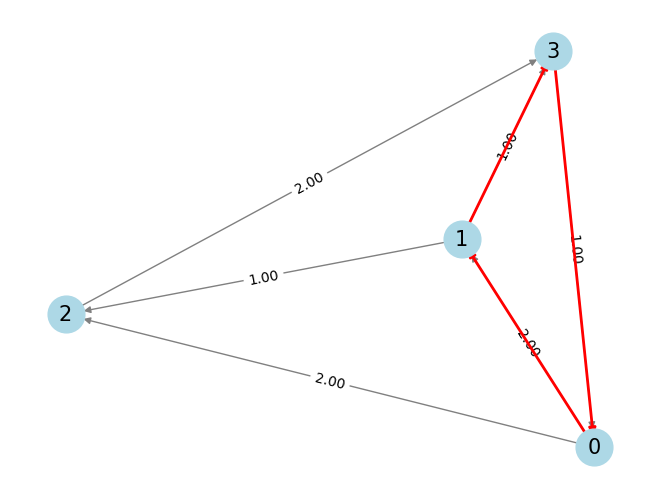

In [3]:
# Standard Library
import random

# Third Party Library
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np


class Ant:
    def __init__(self, graph, alpha, beta):
        self.graph = graph
        self.alpha = alpha
        self.beta = beta
        self.path = []
        self.path_cost = 0.0

    def find_path(self, start_node, pheromones):
        current_node = start_node
        visited = set([current_node])
        self.path = [current_node]
        self.path_cost = 0.0

        while len(visited) < len(self.graph.nodes):
            next_node = self.choose_next_node(
                current_node, pheromones, visited
            )
            if next_node is None:
                break
            self.path_cost += self.graph[current_node][next_node]["weight"]
            self.path.append(next_node)
            visited.add(next_node)
            current_node = next_node

        # Return to start node
        if start_node in self.graph[current_node]:
            self.path_cost += self.graph[current_node][start_node]["weight"]
            self.path.append(start_node)

    def choose_next_node(self, current_node, pheromones, visited):
        edges = [
            node for node in self.graph[current_node] if node not in visited
        ]

        if not edges:
            return None

        probabilities = []
        for node in edges:
            pheromone = pheromones[(current_node, node)]
            heuristic = 1.0 / self.graph[current_node][node]["weight"]
            probabilities.append(
                (pheromone**self.alpha) * (heuristic**self.beta)
            )

        sum_probabilities = sum(probabilities)
        probabilities = [prob / sum_probabilities for prob in probabilities]
        cumulative_probabilities = np.cumsum(probabilities)

        random_value = random.random()

        for i, cumulative_probability in enumerate(cumulative_probabilities):
            if random_value <= cumulative_probability:
                return edges[i]

        return edges[-1]  # Fallback in case of rounding errors


def update_pheromones(pheromones, ants, evaporation_rate, Q):
    # Apply evaporation
    for key in pheromones:
        pheromones[key] *= 1 - evaporation_rate

    # Update pheromones based on ants' paths
    for ant in ants:
        for i in range(len(ant.path) - 1):
            from_node = ant.path[i]
            to_node = ant.path[i + 1]
            pheromones[(from_node, to_node)] += Q / ant.path_cost

    return pheromones


def draw_graph(G, best_path):
    pos = nx.spring_layout(G)
    nx.draw(
        G,
        pos,
        with_labels=True,
        node_color="lightblue",
        edge_color="gray",
        node_size=700,
        font_size=15,
    )
    edge_labels = {
        (u, v): f"{d['weight']:.2f}" for u, v, d in G.edges(data=True)
    }
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    if best_path:
        path_edges = [
            (best_path[i], best_path[i + 1]) for i in range(len(best_path) - 1)
        ]
        nx.draw_networkx_edges(
            G, pos, edgelist=path_edges, edge_color="r", width=2
        )

    plt.show()


def main():
    G = nx.DiGraph()
    edges = [
        (0, 1, 2.0),
        (0, 2, 2.0),
        (1, 2, 1.0),
        (1, 3, 1.0),
        (2, 3, 2.0),
        (3, 0, 1.0),
    ]

    for edge in edges:
        G.add_edge(edge[0], edge[1], weight=edge[2])

    alpha = 1.0
    beta = 2.0
    evaporation_rate = 0.5
    Q = 100.0
    num_ants = 10
    num_iterations = 100

    pheromones = {(edge[0], edge[1]): 1.0 for edge in edges}

    best_ant = None

    for _ in range(num_iterations):
        ants = [Ant(G, alpha, beta) for _ in range(num_ants)]
        for ant in ants:
            ant.find_path(0, pheromones)
        pheromones = update_pheromones(pheromones, ants, evaporation_rate, Q)

        current_best_ant = min(ants, key=lambda ant: ant.path_cost)
        if best_ant is None or current_best_ant.path_cost < best_ant.path_cost:
            best_ant = current_best_ant

    if best_ant:
        print(
            f"Best path: {' -> '.join(map(str, best_ant.path))} with cost: {best_ant.path_cost}"
        )
        draw_graph(G, best_ant.path)
    else:
        print("No valid path found")


if __name__ == "__main__":
    main()


Best path: 0 -> 1 -> 3 -> 0 with cost: 4.0


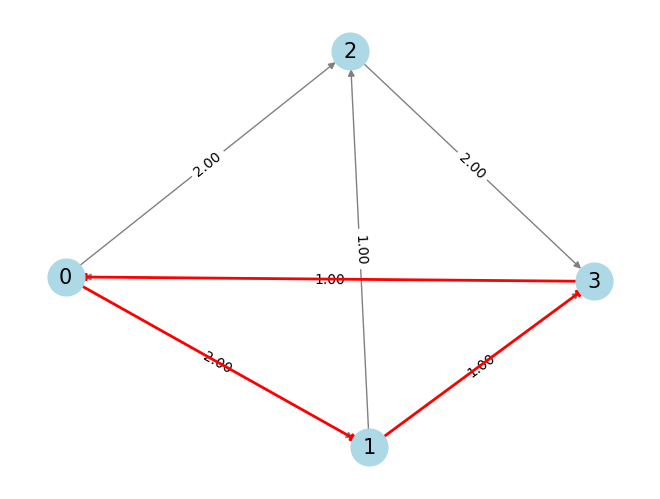

In [5]:
import random
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

class Ant:
    def __init__(self, graph, alpha, beta):
        self.graph = graph
        self.alpha = alpha
        self.beta = beta
        self.path = []
        self.path_cost = 0.0

    def find_path(self, start_node, pheromones):
        current_node = start_node
        visited = set([current_node])
        self.path = [current_node]
        self.path_cost = 0.0

        while len(visited) < len(self.graph.nodes):
            next_node = self.choose_next_node(current_node, pheromones, visited)
            if next_node is None:
                break
            self.path_cost += self.graph[current_node][next_node]['weight']
            self.path.append(next_node)
            visited.add(next_node)
            current_node = next_node

        # Return to start node
        if start_node in self.graph[current_node]:
            self.path_cost += self.graph[current_node][start_node]['weight']
            self.path.append(start_node)

    def choose_next_node(self, current_node, pheromones, visited):
        edges = [node for node in self.graph[current_node] if node not in visited]

        if not edges:
            return None

        probabilities = []
        for node in edges:
            pheromone = pheromones[(current_node, node)]
            heuristic = 1.0 / self.graph[current_node][node]['weight']
            probabilities.append((pheromone ** self.alpha) * (heuristic ** self.beta))

        sum_probabilities = sum(probabilities)
        probabilities = [prob / sum_probabilities for prob in probabilities]
        cumulative_probabilities = np.cumsum(probabilities)

        random_value = random.random()

        for i, cumulative_probability in enumerate(cumulative_probabilities):
            if random_value <= cumulative_probability:
                return edges[i]

        return edges[-1]  # Fallback in case of rounding errors

def update_pheromones(pheromones, ants, evaporation_rate, Q):
    # Apply evaporation
    for key in pheromones:
        pheromones[key] *= (1 - evaporation_rate)

    # Update pheromones based on ants' paths
    for ant in ants:
        for i in range(len(ant.path) - 1):
            from_node = ant.path[i]
            to_node = ant.path[i + 1]
            pheromones[(from_node, to_node)] += Q / ant.path_cost

    return pheromones

def draw_graph(G, best_path):
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=700, font_size=15)
    edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in G.edges(data=True)}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    
    if best_path:
        path_edges = [(best_path[i], best_path[i + 1]) for i in range(len(best_path) - 1)]
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r', width=2)

    plt.show()

def main():
    G = nx.DiGraph()
    edges = [
        (0, 1, 2.0),
        (0, 2, 2.0),
        (1, 2, 1.0),
        (1, 3, 1.0),
        (2, 3, 2.0),
        (3, 0, 1.0)
    ]

    for edge in edges:
        G.add_edge(edge[0], edge[1], weight=edge[2])

    alpha = 1.0
    beta = 2.0
    evaporation_rate = 0.5
    Q = 100.0
    num_ants = 10
    num_iterations = 100

    pheromones = {(edge[0], edge[1]): 1.0 for edge in edges}

    best_ant = None

    for _ in range(num_iterations):
        ants = [Ant(G, alpha, beta) for _ in range(num_ants)]
        for ant in ants:
            ant.find_path(0, pheromones)
        pheromones = update_pheromones(pheromones, ants, evaporation_rate, Q)

        current_best_ant = min(ants, key=lambda ant: ant.path_cost)
        if best_ant is None or current_best_ant.path_cost < best_ant.path_cost:
            best_ant = current_best_ant

    if best_ant:
        print(f"Best path: {' -> '.join(map(str, best_ant.path))} with cost: {best_ant.path_cost}")
        draw_graph(G, best_ant.path)
    else:
        print("No valid path found")

if __name__ == "__main__":
    main()


Best path: 0 -> 4 -> 5 -> 9 -> 10 -> 11 with cost: 5.0


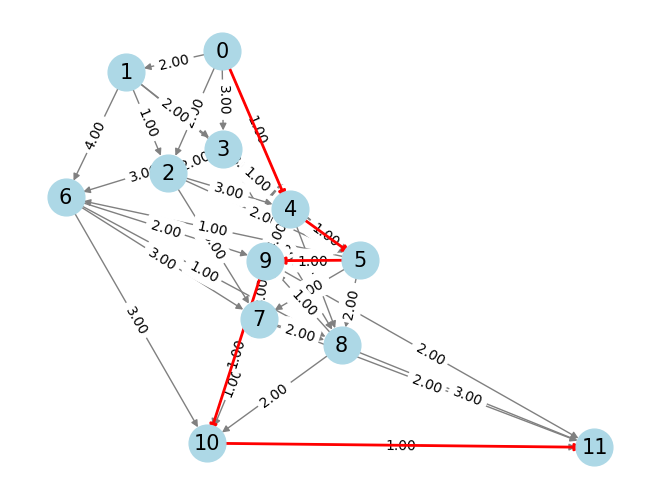

In [12]:
import random
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

class Ant:
    def __init__(self, graph, alpha, beta):
        self.graph = graph
        self.alpha = alpha
        self.beta = beta
        self.path = []
        self.path_cost = 0.0

    def find_path(self, start_node, pheromones):
        current_node = start_node
        visited = {current_node}
        self.path = [current_node]
        self.path_cost = 0.0

        while len(visited) < len(self.graph.nodes):
            next_node = self.choose_next_node(current_node, pheromones, visited)
            if next_node is None:
                break
            self.path_cost += self.graph[current_node][next_node]['weight']
            self.path.append(next_node)
            visited.add(next_node)
            current_node = next_node

        # Return to start node
        if start_node in self.graph[current_node]:
            self.path_cost += self.graph[current_node][start_node]['weight']
            self.path.append(start_node)

    def choose_next_node(self, current_node, pheromones, visited):
        edges = [node for node in self.graph[current_node] if node not in visited]

        if not edges:
            return None

        probabilities = []
        for node in edges:
            pheromone = pheromones[(current_node, node)]
            heuristic = 1.0 / self.graph[current_node][node]['weight']
            probabilities.append((pheromone ** self.alpha) * (heuristic ** self.beta))

        sum_probabilities = sum(probabilities)
        probabilities = [prob / sum_probabilities for prob in probabilities]
        cumulative_probabilities = np.cumsum(probabilities)

        random_value = random.random()
        for i, cumulative_probability in enumerate(cumulative_probabilities):
            if random_value <= cumulative_probability:
                return edges[i]

        return edges[-1]  # Fallback in case of rounding errors

def update_pheromones(pheromones, ants, evaporation_rate, Q):
    # Apply evaporation
    for key in pheromones:
        pheromones[key] *= (1 - evaporation_rate)

    # Update pheromones based on ants' paths
    for ant in ants:
        for i in range(len(ant.path) - 1):
            from_node = ant.path[i]
            to_node = ant.path[i + 1]
            pheromones[(from_node, to_node)] += Q / ant.path_cost

    return pheromones

def draw_graph(G, best_path):
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=700, font_size=15)
    edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in G.edges(data=True)}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    
    if best_path:
        path_edges = [(best_path[i], best_path[i + 1]) for i in range(len(best_path) - 1)]
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r', width=2)

    plt.show()

def main():
    G = nx.DiGraph()
    edges = [
        (0, 1, 2.0), (0, 2, 2.0), (0, 3, 3.0), (0, 4, 1.0),
        (1, 2, 1.0), (1, 3, 2.0), (1, 5, 3.0), (1, 6, 4.0),
        (2, 3, 2.0), (2, 4, 3.0), (2, 5, 2.0), (2, 7, 3.0),
        (3, 4, 1.0), (3, 5, 2.0), (3, 6, 3.0), (3, 8, 2.0),
        (4, 5, 1.0), (4, 7, 2.0), (4, 8, 3.0), (4, 9, 4.0),
        (5, 6, 1.0), (5, 7, 2.0), (5, 8, 2.0), (5, 9, 1.0),
        (6, 7, 3.0), (6, 8, 1.0), (6, 9, 2.0), (6, 10, 3.0),
        (7, 8, 2.0), (7, 9, 3.0), (7, 10, 1.0), (7, 11, 2.0),
        (8, 9, 1.0), (8, 10, 2.0), (8, 11, 3.0), (9, 10, 1.0),
        (9, 11, 2.0), (10, 11, 1.0)
    ]

    G.add_weighted_edges_from(edges)

    alpha = 1.0
    beta = 2.0
    evaporation_rate = 0.5
    Q = 100.0
    num_ants = 20
    num_iterations = 200

    pheromones = {(edge[0], edge[1]): 1.0 for edge in edges}

    best_ant = None

    for _ in range(num_iterations):
        ants = [Ant(G, alpha, beta) for _ in range(num_ants)]
        for ant in ants:
            ant.find_path(0, pheromones)
        pheromones = update_pheromones(pheromones, ants, evaporation_rate, Q)

        current_best_ant = min(ants, key=lambda ant: ant.path_cost)
        if best_ant is None or current_best_ant.path_cost < best_ant.path_cost:
            best_ant = current_best_ant

    if best_ant:
        print(f"Best path: {' -> '.join(map(str, best_ant.path))} with cost: {best_ant.path_cost}")
        draw_graph(G, best_ant.path)
    else:
        print("No valid path found")

if __name__ == "__main__":
    main()
